In [172]:
import pandas as pd
import numpy as np

df = pd.read_csv('phase-2.csv')
df['total_burned'] = df['perc_burned'] + df['perc_preburned']
print(df)

     density  wind_speed  direction strategy  ignition_location  perc_burned  \
0         50           0          1  Nothing                  1        88.58   
1         50           0          1  Nothing                  1        85.36   
2         50           0          1  Nothing                  1        85.93   
3         50           0          1  Nothing                  1        85.86   
4         55           0          1  Nothing                  1        87.01   
..       ...         ...        ...      ...                ...          ...   
175       85           0          1     Wall                  1        73.34   
176       90           0          1     Wall                  1        72.05   
177       90           0          1     Wall                  1         0.14   
178       90           0          1     Wall                  1        69.89   
179       90           0          1     Wall                  1        84.70   

     perc_preburned  village_damaged  s

In [ ]:
#We apply the constraint that the village must not be damaged as a high penalty (we set total_burned to > 1000)
for i,x in df.iterrows():
    if x['village_damaged'] == True:
        df.at[i, 'total_burned'] = 100

print(df)

      density  wind_speed  direction strategy  perc_burned  perc_preburned  \
0          50           0          1  Nothing        87.90            5.99   
1          50           0          1  Nothing        87.40            6.02   
2          50           0          1  Nothing        88.36            6.00   
3          50           0          1  Nothing        88.52            6.06   
4          50           3          1  Nothing        88.32            6.04   
...       ...         ...        ...      ...          ...             ...   
4495       90          23          7     Wall        88.98            1.60   
4496       90          23          8     Wall        89.64            1.63   
4497       90          23          8     Wall        89.60            1.61   
4498       90          23          8     Wall        89.76            1.60   
4499       90          23          8     Wall        89.43            1.61   

      village_damaged  total_burned  
0                True    

In [167]:
import matplotlib.pyplot as plt

#RQ1: een grafiek met op x-as density, 4 lijnen, en op y-as de total_burned

df_without_il = df[df['ignition_location'] == 1]

per_strategy = df.groupby(['strategy'])
for name, group in per_strategy:
    per_density = group.groupby('density')
    x = [n for n,g in per_density]
    y = [g['total_burned'].mean() for n,g in per_density]
    plt.plot(x,y,label=name)
    plt.xlabel('Density')
    plt.ylabel('Average % burned')
    plt.legend()

KeyError: 'ignition_location'

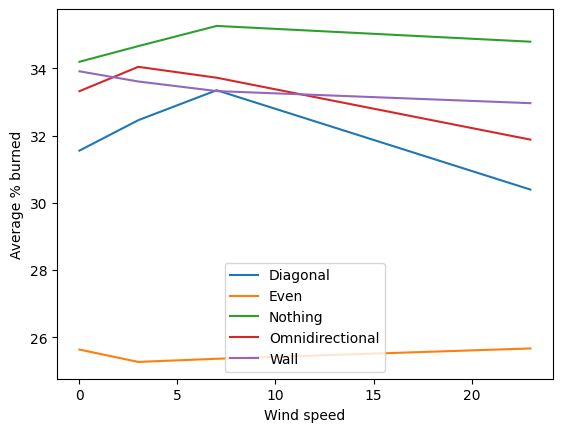

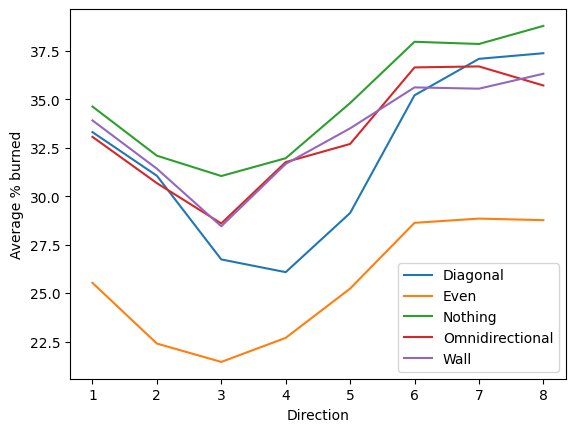

In [162]:
#RQ2: tabel
#                            |   total_burned
#                                Nothing  |  Even  |  Diagonal  |  Omnidirectional  |  Wall
#wind speed  |   direction   |   10       |  20    |  30        |  20               |  15
# 
#   

plt.figure(1)
per_strategy = df.groupby(['strategy'])
for name, group in per_strategy:
    x = [n for n,g in group.groupby('wind_speed')]
    y = [g['total_burned'].mean() for n,g in group.groupby('wind_speed')]
    plt.plot(x,y,label=name)
    plt.xlabel('Wind speed')
    plt.ylabel('Average % burned')
    plt.legend()

plt.figure(2)
per_strategy = df.groupby(['strategy'])
for name, group in per_strategy:
    x = [n for n,g in group.groupby('direction')]
    y = [g['total_burned'].mean() for n,g in group.groupby('direction')]
    plt.plot(x,y,label=name)
    plt.xlabel('Direction')
    plt.ylabel('Average % burned')
    plt.legend()


In [117]:
scores = df.groupby('strategy')['total_burned'].mean()
print(scores)
winning_strategy = scores.idxmin()
print(f'Winner: {winning_strategy}')

strategy
Diagonal           25.641667
Even               28.365833
Nothing            56.781389
Omnidirectional    38.028889
Wall               25.074167
Name: total_burned, dtype: float64
Winner: Wall
